In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

データの作成

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2 * xs - 3 * zs + 5 + noise

np.savez("TF_intro", inputs=generated_inputs, targets=generated_targets)

Trnsorflowの実装

In [3]:
training_data = np.load("TF_intro.npz")

In [14]:
input_size = 2
output_size = 1

# データ　モデル　損失関数　最適化関数　トレーニングループ
# 線型結合のモデル
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            output_size,
            # ある範囲におけるランダムな値で重みを初期化
            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        )
    ]
)

# 学習率を0.02に設定
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# モデルの構造を表示, L2
model.compile(optimizer="sgd", loss="mean_squared_error")

# 訓練をして、結果を得るためのコード
# モデルの当てはまりの良さを確認
# 損失関数の値が小さいほど良い
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 32.9836 - 97ms/epoch - 3ms/step
Epoch 2/100
32/32 - 0s - loss: 4.7110 - 11ms/epoch - 348us/step
Epoch 3/100
32/32 - 0s - loss: 1.5450 - 12ms/epoch - 365us/step
Epoch 4/100
32/32 - 0s - loss: 0.6653 - 11ms/epoch - 349us/step
Epoch 5/100
32/32 - 0s - loss: 0.4328 - 11ms/epoch - 355us/step
Epoch 6/100
32/32 - 0s - loss: 0.3626 - 11ms/epoch - 348us/step
Epoch 7/100
32/32 - 0s - loss: 0.3411 - 12ms/epoch - 360us/step
Epoch 8/100
32/32 - 0s - loss: 0.3341 - 10ms/epoch - 326us/step
Epoch 9/100
32/32 - 0s - loss: 0.3377 - 12ms/epoch - 362us/step
Epoch 10/100
32/32 - 0s - loss: 0.3354 - 11ms/epoch - 355us/step
Epoch 11/100
32/32 - 0s - loss: 0.3325 - 11ms/epoch - 359us/step
Epoch 12/100
32/32 - 0s - loss: 0.3335 - 13ms/epoch - 415us/step
Epoch 13/100
32/32 - 0s - loss: 0.3343 - 17ms/epoch - 528us/step
Epoch 14/100
32/32 - 0s - loss: 0.3379 - 12ms/epoch - 374us/step
Epoch 15/100
32/32 - 0s - loss: 0.3369 - 16ms/epoch - 514us/step
Epoch 16/100
32/32 - 0s - loss: 0.3

重みとバイアスの出力

In [15]:
# 重みは2、バイアスは5
model.layers[0].get_weights()

[array([[ 1.9992471],
        [-3.0095832]], dtype=float32),
 array([5.0129957], dtype=float32)]

In [16]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9992471],
       [-3.0095832]], dtype=float32)

In [17]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0129957], dtype=float32)

出力データ、予測値の出力

In [18]:
model.predict_on_batch(training_data["inputs"]).round(1)

array([[ -8.9],
       [ 22.3],
       [-17. ],
       [ -7.9],
       [-14.9],
       [ -0.3],
       [ -2.3],
       [ 20.9],
       [ -3.9],
       [ -5.2],
       [ 45.8],
       [ 13.3],
       [ -3.7],
       [ 35.6],
       [ -6.5],
       [-27.7],
       [-10. ],
       [  8.5],
       [-15.1],
       [-17.2],
       [ 18.5],
       [-13.9],
       [ 21.9],
       [-24.6],
       [  2.1],
       [ 31.3],
       [ -4.7],
       [-21.7],
       [ 28. ],
       [ -6.4],
       [ 30.7],
       [ 33.5],
       [-35.7],
       [ -4.2],
       [ 45.6],
       [-19.4],
       [  2.8],
       [ 30.8],
       [-14.3],
       [ 36.4],
       [ 24.6],
       [ 16.9],
       [ 35.4],
       [ 20.2],
       [-16.5],
       [-15.5],
       [ 32.8],
       [ 43.2],
       [ 14.8],
       [-15.6],
       [  1.9],
       [-28.5],
       [ -5.7],
       [-38. ],
       [  6.8],
       [  2.4],
       [-33. ],
       [  1.8],
       [  6.8],
       [  0.4],
       [-16.9],
       [ 15.4],
       [

ターゲットの出力

In [19]:
training_data["targets"].round(1)

array([[ -9.2],
       [ 21.8],
       [-16.8],
       [ -8.5],
       [-14.6],
       [  0.2],
       [ -2.7],
       [ 20.5],
       [ -3.6],
       [ -6. ],
       [ 46.7],
       [ 12.6],
       [ -2.9],
       [ 34.8],
       [ -6.4],
       [-28.5],
       [ -9.3],
       [  9.2],
       [-15.8],
       [-16.5],
       [ 17.6],
       [-12.9],
       [ 22.5],
       [-25.3],
       [  2.2],
       [ 32. ],
       [ -4.6],
       [-22.2],
       [ 27.3],
       [ -6.9],
       [ 30.9],
       [ 34. ],
       [-36.1],
       [ -4.1],
       [ 45.7],
       [-19.7],
       [  3.7],
       [ 30.8],
       [-13.3],
       [ 35.5],
       [ 24.6],
       [ 17. ],
       [ 34.5],
       [ 20.5],
       [-15.9],
       [-16.2],
       [ 33.5],
       [ 43.8],
       [ 14.2],
       [-16.2],
       [  1.3],
       [-28.7],
       [ -5.8],
       [-37. ],
       [  6.8],
       [  2.7],
       [-33.3],
       [  2.7],
       [  6.9],
       [  1. ],
       [-16.9],
       [ 14.5],
       [

ターゲットと予測値の散布図

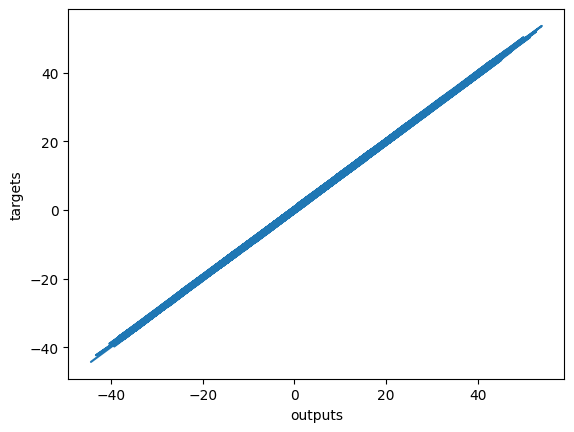

In [13]:
plt.plot(
    np.squeeze(model.predict_on_batch(training_data["inputs"])),
    np.squeeze(training_data["targets"]),
)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()